In [178]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import uncertainties as unc
from scipy import stats
from scipy.stats import norm 
from scipy.stats import uniform
from scipy.stats import binom
from scipy.stats import poisson
from numpy import random
import scipy.constants as const
from tabulate import tabulate
import math
%matplotlib inline

# 1.1 Intro
Use the maximum likelihood estimate method to find the probability distribution functtion
$𝑓(𝑥|𝑎, 𝑏) = 𝑥_0 + 𝑎𝑥 + 𝑏𝑥^2$ that best describes the following dataset: https://canvas.uw.edu/files/125432781/downloaddownload_frd=1. <br>
In this parameterization $𝑥_0$ is a function of $(a,b)$ and it normalizes the PDF $𝑓(𝑥|𝑎, 𝑏)$ within the
range $[−1, 1]$.

#### Likelihood Inference for Several Parameters (Texbook Section 6.5.3)
For several parameters $\lambda_k$, parameters may be combined into a single vector $\boldsymbol{\lambda}={\lambda_1,...,\lambda_K}$: <br> <br>
\begin{equation}
L(\boldsymbol{\lambda})=\boldsymbol{\Pi}_{i=1}^{N}f(x_i|\boldsymbol{\lambda}) \\
lnL(\boldsymbol{\lambda})=\boldsymbol{\sum}_{i=1}^{N}lnf(x_i|\boldsymbol{\lambda})
\end{equation}
<br>
To find the maximum of the likelihood function, set the partial derivatives to zero. Those values $\hat{\lambda_k}$ which satisfy the system of equations obtained are the MLEs $\hat{\lambda_k}$ of the parameters $\lambda_k$: <br> <br>
\begin{equation}
\frac{\partial{lnL}}{\partial\lambda_k}|_{\lambda_1,...,\lambda_K}=0
\end{equation}
<br>
The error interval is now to be replaced by an error volume with its surface degined by the drop of $lnL$ by $1/2$: <br> <br>
\begin{equation}
lnL(\boldsymbol{\hat{\lambda}})-lnL(\boldsymbol{\lambda})=1/2
\end{equation}
We must assume that this defines a closed surface in the parameter space, in two dimensions just a closed contour.

#### MLE Calculation
For p.d.f. $𝑓(𝑥|𝑎, 𝑏) = 𝑥_0 + 𝑎𝑥 + 𝑏𝑥^2$, where $𝑥_0$ is a function of $(a,b)$ and it normalizes the PDF $𝑓(𝑥|𝑎, 𝑏)$ within the range $[−1, 1]$, the variance is $\sigma^2$. The likelihood function is then: <br>
\begin{equation}
L(\alpha, \beta, \sigma^2|\boldsymbol{y,x})
\end{equation}
For which we want to maximize the parameters $\alpha$ and $\beta$

\begin{equation}
\end{equation}

(999, 1)
      0.949707
0    -0.560359
1    -0.263872
2     0.888692
3    -0.388929
4     0.183349
..         ...
994  -0.054795
995  -0.096953
996   0.391595
997  -0.721753
998  -0.279068

[999 rows x 1 columns]


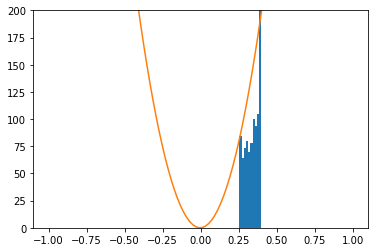

In [199]:
# Read in data
d = pd.read_csv('data_homework4.csv')
print(d.shape)
# plt.hist(d, bins=100)
n = norm.pdf(d)
plt.hist(n)
print(d)

# plot of dist.pdf equation with estimate of params a and b
x = np.linspace(-1,1,100)
y = x + x ** 2
plt.plot(x, ((10* x) + ((35*x)**2) + (1/35)))
plt.ylim(0,200)
plt.show()

In [204]:
# The log likelihood function
def NLL(x, A, B, x0):
    x = np.asarray(x) # x is a 1d an array
    N = len(x) # N is the max of i iterations in summation of log-likelihood 
    b_shape = np.broadcast(B, A,x0).shape # Broadcast so that operations between arrays can be performed
    x = x.reshape(x.shape + tuple([1 for s in b_shape])) # x now has 3 dimensions
    nll = np.sum(np.log(x0 + (A * x) + (B * x**2)), 0)
    print(nll.shape)
    return nll

In [205]:
x0_vals = np.linspace(0.1,50,100)
A_vals = np.linspace(0.1, 50, 100)
B_vals = np.linspace(0.1, 50, 100)
xi = np.linspace(-1,1,999)
# fNll = NLL(d, A_vals, B_vals[:,np.newaxis], x0_vals)
print(fNll)

np.random.seed(36)

neg_LL = NLL(d, A_vals, B_vals[:,np.newaxis], x0_vals)


max_NLL =  neg_LL.max()
print(max_NLL)
A_max, B_max, x0_max = np.where(neg_LL >= max_NLL) # index of array where element correspond to val for max NLL
print(A_max, B_max, x0_max)
A0 = A_vals[A_max]
B0 = B_vals[B_max]
x0 = x0_vals[x0_max]
print(A0)
print(B0)
print(x0)



33063546.76201223
(1, 100, 100)
4190.065101911754
[0] [99] [99]
[0.1]
[50.]
[50.]


In [213]:
def LL(d, A, B):
    d = d.values.flatten()
    d = np.asarray(d)
    np.reshape(d, (999,))
    print('d', d.shape)
    N=len(d)
    shape = np.broadcast(B, A).shape
    print('A', A.shape)
    print('B', B.shape)
    d = d.reshape(d.shape + tuple([1 for s in shape]))
    nll = (1/B) * np.sum(np.log((A * d) + (B * d**2)), 0)
    print('shape', shape)
    print('d', d.shape)
    print('nll', nll.shape)
    return nll


A_vals = np.linspace(0.1, 100, 100)
B_vals = np.linspace(0.1, 100, 100)

# fNll = NLL(d, A_vals, B_vals[:,np.newaxis], x0_vals)
print(fNll)

np.random.seed(36)

neg_LL = LL(d, A_vals, B_vals[:,np.newaxis])


# max_NLL =  neg_LL.max()
# print(max_NLL)
# A_max, B_max = np.where(neg_LL >= max_NLL) # index of array where element correspond to val for max NLL
# print(A_max, B_max)
# A0 = A_vals[A_max]
# B0 = B_vals[B_max]

# print(A0)
# print(B0)




33063546.76201223
d (999,)
A (100,)
B (100, 1)
shape (100, 100)
d (999, 1, 1)
nll (100, 100)


/var/folders/nx/62hxrsd15jj4532cfpqnfbsw0000gn/T/ipykernel_1513/901670526.py:11: RuntimeWarning: invalid value encountered in log
  nll = (1/B) * np.sum(np.log((A * d) + (B * d**2)), 0)


### 1.2 (1) Find and fit using the negative log likelihood
Using techniques we’ve discussed find the negative log likelihood for (𝑎, 𝑏) using the provided
dataset.
Follow the tutorial of the iminuit package to find the best likelihood fit results. The tutorial can be
found here: https://scikit-hep.org/iminuit/notebooks/cost_functions.html. PLease note
that iminuit is very sensitive to the beginning parameter values and the allowed range of each
parameter - so expect to fiddle a bit to get it to work properly.

### 1.3 (2) Plot the fit
Project the data into a histogram with range [−1, 1] and bin width 0.1. Draw statistical unvertianty
as a vertical bar in each bin. Draw the best-fit PDF from (1) on top.


In [ ]:
# def best_func(x, A0, B0, x0):
#     y = x0 + (A0 * x) + (B0 * x ** 2)
#     return y

d = np.asarray(d)
print(d[5])
y = np.zeros(999)
print(y[4])
for i in range(999):
    y[i] = 50 + (0.1 * d[i]) + (50 * d[i] ** 2)
# y = 50 + (0.1 * d) + (50 * d ** 2)

y = 0.1 * d + (50 * d ** 2)
plt.plot(d, y)
plt.show()

In [ ]:
x = uniform.rvs(size=999)
x = np.linspace(-1,1,999)
# print(x)
y = 0.1 * x + (50 * x ** 2)
plt.plot(x,y)


d = pd.read_csv('data_homework4.csv')
print(len(d))
# plt.hist(d, bins=100)
n = norm.pdf(d)
plt.hist(n)


### 1.4 (3) Countours
Draw the contour of the negative log likelihood, −2 ln(𝐿) as a function of (𝑎, 𝑏). Plot the best-fit
values with dashed lines. Results should look something like below (you’ll need to adjust ranges,
etc. etc.):
